<a href="https://colab.research.google.com/github/xCocco0/alzheimer-recognition/blob/main/alzheimer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title
This is the description of the project.

---
### Import modules

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

### Load data

In [99]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/oasis3-normalized.csv")

In [101]:
df[['Age','Height','Weight']].groupby('cdr').mean()

,Sex,Age,Height,Weight,Education,Hand,mmse,homehobb,judgment,memory,orient,perscare,apoe,sumbox,eTIV,nWBV
cdr,,,,,,,,,,,,,,,,
0.0,0.423756,66.656501,1675.913323,78.487961,15.861958,0.943820,28.882825,0.001605,0.014446,0.000000,0.000000,0.000000,31.121990,0.017657,1.492331e+06,0.603568
0.5,0.533333,72.577778,1680.377778,76.000000,15.122222,0.894444,26.588889,0.347222,0.486111,0.605556,0.363889,0.047222,33.116667,2.122222,1.526792e+06,0.572883
1.0,0.566265,73.325301,1670.614458,74.891566,14.843373,0.987952,21.277108,1.132530,1.144578,1.210843,1.030120,0.506024,32.301205,6.006024,1.565182e+06,0.541867
2.0,0.350000,71.050000,1621.800000,65.750000,14.000000,0.950000,15.250000,1.850000,1.900000,1.975000,1.875000,1.450000,31.950000,11.000000,1.513617e+06,0.539500


### Graphs

---
# TEST

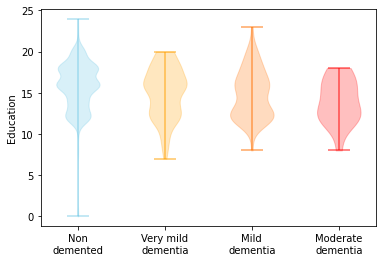

In [183]:
fig, ax = plt.subplots()

colorlist = ['#64C4E480','#FFA000A0','#FF7000A0','#FF0000A0']
index = 0
for i in [0,0.5,1,2]:
  parts = ax.violinplot([
               df[df.cdr == i]['Education'].to_numpy(dtype = float),
              ], [index+1])

  parts['bodies'][0].set_color(colorlist[index])
  parts['cbars'].set_color(colorlist[index])
  parts['cmins'].set_color(colorlist[index])
  parts['cmaxes'].set_color(colorlist[index])
  parts['bodies'][0].set_alpha(0.25)
  index += 1

ax.set_xticks([1,2,3,4])
ax.set_xticklabels(['Non\ndemented', 'Very mild\ndementia', 'Mild\ndementia', 'Moderate\ndementia'])
ax.set_ylabel('Education')
plt.show()

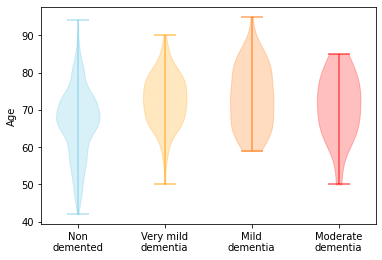

In [184]:
fig, ax = plt.subplots()

colorlist = ['#64C4E480','#FFA000A0','#FF7000A0','#FF0000A0']
index = 0
for i in [0,0.5,1,2]:
  parts = ax.violinplot([
               df[df.cdr == i]['Age'].to_numpy(dtype = float),
              ], [index+1])

  parts['bodies'][0].set_color(colorlist[index])
  parts['cbars'].set_color(colorlist[index])
  parts['cmins'].set_color(colorlist[index])
  parts['cmaxes'].set_color(colorlist[index])
  parts['bodies'][0].set_alpha(0.25)
  index += 1

ax.set_xticks([1,2,3,4])
ax.set_xticklabels(['Non\ndemented', 'Very mild\ndementia', 'Mild\ndementia', 'Moderate\ndementia'])
ax.set_ylabel('Age')
plt.show()

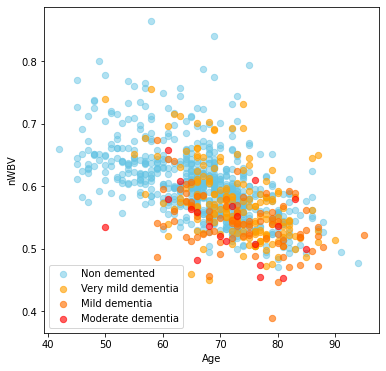

In [208]:
fig, ax = plt.subplots(figsize=(6, 6))

colormap = {0.0:'#64C4E480', 0.5:'#FFA000A0', 1.0:'#FF7000A0', 2.0:'#FF0000A0'}
labelmap = {0.0:'Non demented', 0.5:'Very mild dementia', 1.0:'Mild dementia', 2.0:'Moderate dementia'}

for i in colormap:
  ax.scatter(df[df.cdr == i]['Age'], df[df.cdr == i]['nWBV'], c = colormap[i], label = labelmap[i], s = 40)

ax.legend()
plt.xlabel('Age')
plt.ylabel('nWBV')
plt.show()

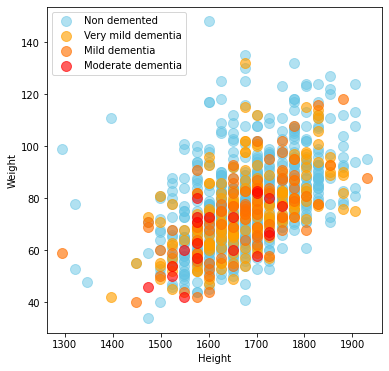

In [76]:
fig, ax = plt.subplots(figsize=(6,6))

for i in colormap:
  ax.scatter(df[df.cdr == i]['Height'], df[df.cdr == i]['Weight'], c = colormap[i], label = labelmap[i], s = 100)

ax.legend()
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

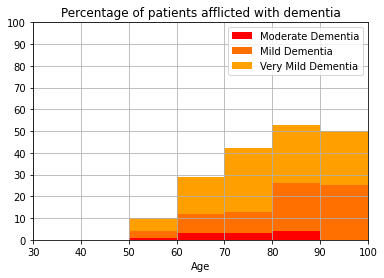

In [193]:
ages = np.zeros((10,5))
ages_labels = np.arange(5,105,10)
mapind = {0.0:1, 0.5:2, 1.0:3, 2.0:4}
for index, row in df.iterrows():
  ages[int(row["Age"]/10), mapind[row["cdr"]]] += 1
  ages[int(row["Age"]/10), 0] += 1
#print(ages)
for row in ages:
  for i in range(1,5):
    if row[0] == 0:
      row[i] = 0
    else:
      row[i] = np.ceil(100 * row[i] / row[0])
#print(ages)

fig, ax = plt.subplots()
ax.bar(ages_labels, ages[:,4], width = 10, color = "#FF0000", label = "Moderate Dementia")
ax.bar(ages_labels, ages[:,3], width = 10, bottom = ages[:,4], color = "#FF7000", label = "Mild Dementia")
ax.bar(ages_labels, ages[:,2], width = 10, bottom = ages[:,4]+ages[:,3], color = "#FFA000", label = "Very Mild Dementia")
#ax.bar(ages_labels, ages[:,1], width = 10, bottom = ages[:,4]+ages[:,3]+ages[:,2], color = "#64C4E4")
ax.set_title("Percentage of patients afflicted with dementia")
ax.set_ylim(0,100)
ax.set_xlim(30,100)
ax.set_yticks(range(0,101,10))
ax.grid()
ax.set_xlabel("Age")
ax.legend()
plt.show()


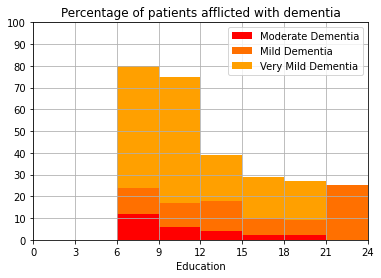

In [186]:
ages = np.zeros((9,5))
ages_labels = np.arange(1.5,26.5,3)
mapind = {0.0:1, 0.5:2, 1.0:3, 2.0:4}
for index, row in df.iterrows():
  ages[int(row["Education"]/3), mapind[row["cdr"]]] += 1
  ages[int(row["Education"]/3), 0] += 1
#print(ages)
for row in ages:
  for i in range(1,5):
    if row[0] == 0:
      row[i] = 0
    else:
      row[i] = np.ceil(100 * row[i] / row[0])
#print(ages)

fig, ax = plt.subplots()
ax.bar(ages_labels, ages[:,4], width = 3, color = "#FF0000", label = "Moderate Dementia")
ax.bar(ages_labels, ages[:,3], width = 3, bottom = ages[:,4], color = "#FF7000", label = "Mild Dementia")
ax.bar(ages_labels, ages[:,2], width = 3, bottom = ages[:,4]+ages[:,3], color = "#FFA000", label = "Very Mild Dementia")
#ax.bar(ages_labels, ages[:,1], width = 10, bottom = ages[:,4]+ages[:,3]+ages[:,2], color = "#64C4E4")
ax.set_title("Percentage of patients afflicted with dementia")
ax.set_ylim(0,100)
ax.set_xlim(0,24)
ax.set_xticks(range(0,25,3))
ax.set_yticks(range(0,101,10))
ax.grid()
ax.set_xlabel("Education")
ax.legend()
plt.show()

[[ 50. 558.  15.]
 [ 20. 159.   1.]
 [  4.  76.   3.]
 [  2.  17.   1.]]


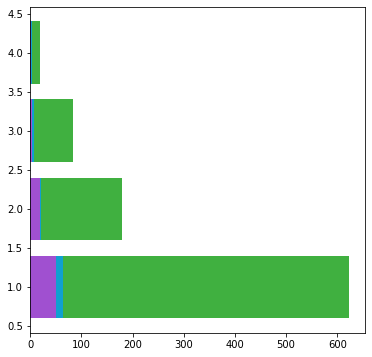

In [282]:
fig, ax = plt.subplots(figsize=(6,6))
handness = np.empty((4,3))
for i in range(0,3):
  handness[:,i] = df[df.Hand == i].groupby('cdr').count()["ID"]
for i in range(0,4):
  pass #TODO
print(handness)

ax.barh([1,2,3,4], handness[:,0], color = "#a050d0")
ax.barh([1,2,3,4], handness[:,2], left = handness[:,0], color = "#10a0d0")
ax.barh([1,2,3,4], handness[:,1], left = handness[:,2]+handness[:,0], color = "#40b040")
plt.show()

---
# Training

In [ ]:
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

In [ ]:
#SVC(gamma='auto')

# References
- https://www.oasis-brains.org/
- https://www.oasis-brains.org/files/OASIS-3_Imaging_Data_Dictionary_v1.5.pdf
- https://surfer.nmr.mgh.harvard.edu/fswiki/MorphometryStats
- http://www.ajnr.org/content/22/8/1483
- https://jamanetwork.com/journals/jamaneurology/fullarticle/775393